<a href="https://colab.research.google.com/github/Mwanaidii/Mwanaidii-Sentiment-Analysis-of-Jumia-Kilimall-and-Jiji-for-App-X-Development-Insights/blob/main/SENTIMENT_ANALYSIS_3_STORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####INTRODUCTION:
Sentiment Analysis of Online Stores in Kenya
The rapid expansion of e-commerce in Kenya has seen platforms like Jumia, Kilimall, and Jiji dominate the online shopping landscape, offering consumers unprecedented convenience. As competition intensifies and customer expectations continue to rise, it becomes increasingly important for online platforms to not only attract customers but also retain their loyalty by delivering exceptional experiences. To remain competitive, these platforms must continuously refine their offerings based on user feedback. This project leverages sentiment analysis of customer reviews from popular Kenyan e-commerce sites to extract valuable insights into consumer perceptions. The primary goal is to inform the development of a new e-commerce app, "X," by identifying strengths, weaknesses, and opportunities for enhancement within the current market.

By analyzing patterns in sentiment, we aim to pinpoint the aspects of existing platforms that resonate most with users, as well as highlight common frustrations and areas in need of improvement. This research will compare the sentiment scores of various platforms to determine which has better customer reviews, thereby providing actionable insights for the new app's development team. The findings will enable "App X" to strategically adopt best practices from established competitors while avoiding pitfalls, ultimately helping developers create a user-centric platform optimized for the Kenyan market. These data-driven insights will empower the team to prioritize features that align with consumer preferences, fostering a competitive edge in the evolving e-commerce landscape.

####Key Questions Our Analysis Aims to Answer:
1. Which online store (Jumia, Kilimall, or Jiji) has the highest positive sentiment from customers based on recent reviews?

2. What are the common pain points or negative experiences reported by users across these platforms?

3. Which features or aspects of online shopping do customers most frequently praise on each platform?

4. What actionable insights can be drawn to enhance the functionality and user experience of the new app "X" based on customer feedback from existing platforms?

These questions will guide the analysis to ensure that the new app "X" is optimized for customer needs and stands out in the competitive online shopping market in Kenya.

####1. Importing Libraries

In [ ]:
!pip install google_play_scraper
!pip install emoji
!pip install wordcloud
!pip install TextBlob

## We can use libraries like NLTK, Gensim, TextBlob, spaCY, CoreNLP for data pre-processing and sentiment analysis.
## We will use NLTK for pre-processing of data and TextBlob to calculate sentiment score (sentiment polarity and subjectivity ).

In [ ]:
# importing important libraries
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import string
import emoji
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####2. Jumia, Kilimall and Jiji Reviews Web Scrapping, Data Importation and data description

a) Web scrapping and Loading Data

In [ ]:
#scrap Jumia reviews
Jumia, continuation_token = reviews(
    'com.jumia.android',
    sort = Sort.MOST_RELEVANT, # sort using at( date and time)
    count = 1000,
    filter_score_with = None
    )

#scrap Kilimall reviews
Kilimall, continuation_token = reviews(
    'net.kilimall.shop',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with = None
)

#scrap Jiji reviews
Jiji, continuation_token = reviews(
    'com.olx.ssa.ke',
    sort = Sort.MOST_RELEVANT,
    #count = 1000,
    filter_score_with = None
)

b) Data Importation ( Jumia, Kilimall, Jiji)

In [ ]:
#Converting the scrapped data to Data Frame(Structured data) for our analysis.
pd.reset_option('display.max_colwidth')
#Convert Jumia data into a data frame
Jumia_rawdata = pd.DataFrame(np.array(Jumia), columns = ['review'])
Jumia_rawdata = Jumia_rawdata.join(pd.DataFrame(Jumia_rawdata.pop('review').tolist()))
Jumia_rawdata.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c6ecd0fa-edb1-461a-b457-bd37fee531a4,All Shipper,https://play-lh.googleusercontent.com/a/ACg8oc...,The app improves and is consumer friendly. The...,4,2031,16.6.1,2024-11-23 07:37:21,We are honored that you have chosen us and pla...,2024-11-26 10:46:58,16.6.1
1,cc7f01e9-4695-4953-8d58-ef0f0eb7679f,Olawande Adebayo,https://play-lh.googleusercontent.com/a-/ALV-U...,It's an easy to use app with just one challeng...,4,18,7.6,2021-11-03 09:45:20,"Thank you , dear Adebayo ^^",2018-02-13 14:03:12,7.6
2,d367c2b9-f07f-4664-aaac-a514fc5c9548,PablAnu Coats,https://play-lh.googleusercontent.com/a-/ALV-U...,"Very helpful, can find a lot of items. But som...",4,205,14.14.0,2024-05-02 07:24:39,Thank you so much ! We're trying our best to m...,2024-05-03 10:38:52,14.14.0
3,531e70b7-a702-4de5-84e9-a18f27f05b9a,Brendah Akoth,https://play-lh.googleusercontent.com/a-/ALV-U...,Great app for shopping. I use it all the time ...,5,1220,16.4.1,2024-12-23 22:44:20,What a wonderful review ! We’re having this hu...,2024-12-24 09:40:57,16.4.1
4,9773a509-dd0d-4bc5-8ead-1d0aecc77eed,cece nene,https://play-lh.googleusercontent.com/a/ACg8oc...,The only good thing about this is that it's on...,1,3,5.11.1,2020-05-03 16:11:06,None,NaT,5.11.1


In [ ]:
#Convert Kilimall data into a data frame
Kilimall_rawdata = pd.DataFrame(np.array(Kilimall), columns = ['review'])
Kilimall_rawdata = Kilimall_rawdata.join(pd.DataFrame(Kilimall_rawdata.pop('review').tolist()))
Kilimall_rawdata.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2786f874-37e7-4fea-92f7-02808c84617b,Naseem Ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hey Kilimall, I've noticed that after the rece...",5,0,5.9.1,2025-04-24 10:51:00,"Hi, sorry for the inconvenience caused. We kno...",2025-04-24 06:19:22,5.9.1
1,09ee17a9-5009-435e-a692-f37fd892a504,ndanu fridah,https://play-lh.googleusercontent.com/a-/ALV-U...,I ordered neckband earphones. And I read the d...,1,18,5.8.1,2025-03-29 04:23:43,"Dear customer, we feel sorry for unhappy exper...",2025-04-11 04:02:19,5.8.1
2,da4a28a9-d18e-4113-8125-a053435d0581,daniel sila,https://play-lh.googleusercontent.com/a-/ALV-U...,One of the worst and most unresponsive platfor...,1,0,5.8.1,2025-04-11 06:40:31,"Dear daniel sila,we are very sorry to bring yo...",2025-04-18 08:07:41,5.8.1
3,5af59ce6-58c2-4764-b8bf-dd9ca13c1699,Sum Meshack Kipchirchir,https://play-lh.googleusercontent.com/a/ACg8oc...,They allow some sellers to sell items that are...,1,0,5.8.1,2025-04-06 09:11:44,"Dear customer, sorry for not bringing you your...",2025-04-11 03:36:59,5.8.1
4,be9ec93c-58c0-4f59-b6ae-f3e6d22d431e,Beryl Omondi,https://play-lh.googleusercontent.com/a-/ALV-U...,Exceptionally customer service from one Ann Ch...,5,0,5.8.1,2025-04-11 07:34:45,"Dear customer, your satisfaction is our priori...",2025-04-18 08:07:03,5.8.1


In [ ]:
#Convert Jiji data into a data frame
Jiji_rawdata = pd.DataFrame(np.array(Jiji), columns = ['review'])
Jiji_rawdata = Jiji_rawdata.join(pd.DataFrame(Jiji_rawdata.pop('review').tolist()))
Jiji_rawdata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d674aa88-a5a9-4093-b068-fbbeb1c1e5f5,Gerald Wakaba,https://play-lh.googleusercontent.com/a-/ALV-U...,I love the app. I bought several items through...,5,212,4.10.4.0,2025-02-26 21:08:07,Thanks for your feedback! We are working const...,2025-03-06 11:43:32,4.10.4.0
1,afb33911-2841-4db7-9ff7-24096afc94eb,Chris Mwaura,https://play-lh.googleusercontent.com/a-/ALV-U...,"Great app, I love it! one issue though, I can'...",5,18,4.10.5.1,2025-04-17 14:01:32,Thank you for the love and your patience! We'r...,2025-04-22 12:42:32,4.10.5.1
2,f3e308a7-3982-4bd5-bbb5-605d0f24795b,Josphat Suka,https://play-lh.googleusercontent.com/a-/ALV-U...,I have been using jiji since time immemorial w...,4,0,4.10.5.1,2025-04-19 13:19:10,Thank you so much for your long-time support a...,2025-04-22 12:27:58,4.10.5.1
3,ef009bf4-cfa9-4242-9532-e38a9bb50ada,steve njuguna,https://play-lh.googleusercontent.com/a/ACg8oc...,The app is actually really nice and simple to ...,5,212,4.10.4.0,2025-02-12 23:44:47,We do appreciate your feedback! Our team is wo...,2025-03-10 11:49:43,4.10.4.0
4,afc1c1ab-38c9-433d-9a17-a33dd8634135,peter mbogoro,https://play-lh.googleusercontent.com/a-/ALV-U...,It's the best marketing for vehicles. Coz what...,5,92,4.10.3.2,2025-01-31 06:24:50,We’re grateful for your feedback! Your support...,2025-01-31 14:14:45,4.10.3.2


#### 3. Exploratory Data Analysis (EDA)
3a) Data Shape and Info

In [ ]:
# Jumia Data Shape and Info
print(Jumia_rawdata.shape)
Jumia_rawdata.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  943 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          845 non-null    object        
 9   repliedAt             845 non-null    datetime64[ns]
 10  appVersion            943 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


In [ ]:
# Kilimall Data Shape and Info
print(Kilimall_rawdata.shape)
Kilimall_rawdata.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  919 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          895 non-null    object        
 9   repliedAt             895 non-null    datetime64[ns]
 10  appVersion            919 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


In [ ]:
# Jiji Data Shape and Info
print(Jiji_rawdata.shape)
Jiji_rawdata.info()

(100, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   content               100 non-null    object        
 4   score                 100 non-null    int64         
 5   thumbsUpCount         100 non-null    int64         
 6   reviewCreatedVersion  93 non-null     object        
 7   at                    100 non-null    datetime64[ns]
 8   replyContent          97 non-null     object        
 9   repliedAt             97 non-null     datetime64[ns]
 10  appVersion            93 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.7+ KB


3b) Checking for Missing Values and the data Description

In [ ]:
#Jumia missing values and data Description
Jumia_rawdata.describe()
Jumia_rawdata_sum_missing = Jumia_rawdata.isnull().sum()
print(Jumia_rawdata_sum_missing)
Jumia_rawdata.describe()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     57
at                        0
replyContent            155
repliedAt               155
appVersion               57
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,1000.000000,1000.000000,1000,845
mean,3.044000,176.747000,2024-01-17 20:05:52.804000,2023-10-18 14:14:13.102958592
min,1.000000,0.000000,2018-10-12 10:17:11,2018-01-29 13:42:38
25%,1.000000,0.000000,2022-12-17 00:37:57.750000128,2022-06-01 16:39:42
50%,3.000000,1.000000,2025-01-09 16:46:48.500000,2024-12-13 13:36:55
75%,5.000000,13.250000,2025-03-13 10:18:38.249999872,2025-02-26 12:22:13
max,5.000000,5654.000000,2025-04-23 11:43:12,2025-04-11 15:23:51
std,1.577515,581.353639,NaN,NaN


In [ ]:
#Kilimall missing values and data Description
Kilimall_rawdata_sum_missing = Kilimall_rawdata.isnull().sum()
print(Kilimall_rawdata_sum_missing)
Kilimall_rawdata.describe()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     81
at                        0
replyContent            105
repliedAt               105
appVersion               81
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,1000.000000,1000.000000,1000,895
mean,3.372000,31.635000,2023-03-23 21:56:13.398000128,2023-06-26 18:21:56.699441152
min,1.000000,0.000000,2018-09-12 13:14:22,2018-09-25 02:36:54
25%,1.000000,0.000000,2021-01-14 03:20:06.750000128,2021-11-04 02:10:24
50%,4.000000,1.000000,2024-02-14 17:23:27.500000,2024-05-24 06:54:43
75%,5.000000,5.000000,2025-03-09 20:24:57.249999872,2025-03-13 06:31:25
max,5.000000,4440.000000,2025-04-24 10:51:00,2025-04-24 10:35:08
std,1.756332,211.215534,NaN,NaN


In [ ]:
#Jiji missing values and data Description
Jiji_rawdata_sum_missing = Jiji_rawdata.isnull().sum()
print(Jiji_rawdata_sum_missing)
Jiji_rawdata.describe()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    7
at                      0
replyContent            3
repliedAt               3
appVersion              7
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,100.000000,100.000000,100,97
mean,3.010000,218.950000,2022-09-13 05:19:25.970000128,2022-10-01 14:59:05.164948480
min,1.000000,0.000000,2018-10-18 06:44:11,2018-10-18 09:26:25
25%,1.000000,4.000000,2020-08-26 16:21:20.249999872,2020-09-02 14:32:28
50%,3.000000,15.000000,2023-03-15 15:40:00.500000,2023-07-26 13:21:15
75%,5.000000,100.000000,2025-01-24 05:18:26.750000128,2025-01-31 15:11:27
max,5.000000,4599.000000,2025-04-23 09:02:31,2025-04-24 13:30:33
std,1.708535,644.776782,NaN,NaN


####4. Data Preprocessing
4a) We will rename the columns, drop unnecessary ones, and remove columns with null values to simplify the data analysis process.

In [ ]:
###JUMIA
# renaming the at column
Jumia_data = pd.DataFrame(Jumia_rawdata)  # Creating a DataFrame
Jumia_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns for Jumia Data
Jumia_data1 = Jumia_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

# arranging the data starting from the newest to oldest
Jumia_pointsort_data = Jumia_data1.sort_values(by="Review_timestamp", ascending= False)
Jumia_pointsort_data.head()

,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
497,you should advertise your product well such as...,17.2.0,2,2025-04-23 11:43:12,0
286,"good app but when your device breaks down, tha...",17.2.0,2,2025-04-23 09:58:46,0
192,some items state only one item left only to be...,17.2.0,2,2025-04-23 09:42:33,0
295,"why is transport always higher ,, almost the s...",17.2.0,2,2025-04-23 03:04:47,0
506,they really deliver. especially earlier than time,17.2.0,4,2025-04-22 23:46:06,0


In [ ]:
###KILIMALL
#renaming the at column
Kilimall_data = pd.DataFrame(Kilimall_rawdata)  # Creating a DataFrame
Kilimall_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns
Kilimall_data1 = Kilimall_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

#Arranging the data starting from the newest to oldest
Kilimall_pointsort_data = Kilimall_data1.sort_values(by="Review_timestamp", ascending= False)
Kilimall_pointsort_data.head()


,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
0,"Hey Kilimall, I've noticed that after the rece...",5.9.1,5,2025-04-24 10:51:00,0
49,I made an order but unfortunately I was not ar...,5.9.0,5,2025-04-23 11:44:30,0
356,"wow wow wonderful service, delivery on time, w...",5.8.1,5,2025-04-23 08:58:29,0
9,kilimall faster and affordable. easy to assess...,5.9.0,4,2025-04-23 06:43:46,0
188,fast and affordable,5.9.1,5,2025-04-22 20:23:03,0


In [ ]:
###JIJI
#renaming the at column
Jiji_data = pd.DataFrame(Jiji_rawdata)  # Creating a DataFrame
Jiji_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns
Jiji_data1 = Jiji_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

#Arranging the data starting from the newest to oldest
Jiji_pointsort_data = Jiji_data1.sort_values(by="Review_timestamp", ascending= False)
Jiji_pointsort_data.head()

,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
36,perfect platform and great customer service fr...,4.10.5.1,5,2025-04-23 09:02:31,0
19,I have had terrible experience this weekend! N...,4.10.5.1,1,2025-04-21 17:55:24,0
41,"Helpful when searching for products locally, p...",4.10.5.1,5,2025-04-21 05:19:18,0
6,"quick response, easy to connect to the seller ...",4.10.5.1,5,2025-04-20 15:27:17,0
2,I have been using jiji since time immemorial w...,4.10.5.1,4,2025-04-19 13:19:10,0


4b) Lowercasing to maintain consistency of data


In [ ]:
# check data type of Jumia data content and change to str
print(type(Jumia_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


In [ ]:
# check data type of Kilimall data content and change to str
print(type(Kilimall_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


In [ ]:
# check data type of Jiji data content and change to str
print(type(Jiji_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


Convert the data Type to String and Lowercase the contents of the data

In [ ]:
#JUMIA
#convert to str
Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].astype(str)

#Lowercase all reviews
Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].apply(lambda x: x.lower())
print(Jumia_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can only see the difference if we look at the whole dataset.

497    you should advertise your product well such as...
286    good app but when your device breaks down, tha...
192    some items state only one item left only to be...
295    why is transport always higher ,, almost the s...
506    they really deliver. especially earlier than time
Name: content, dtype: object


In [ ]:
#KILIMALL
#convert to str
Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].astype(str)

#Lowercase all reviews
Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].apply(lambda x: x.lower())
print(Kilimall_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can only see the difference if we look at the whole dataset.

0      hey kilimall, i've noticed that after the rece...
49     i made an order but unfortunately i was not ar...
356    wow wow wonderful service, delivery on time, w...
9      kilimall faster and affordable. easy to assess...
188                                  fast and affordable
Name: content, dtype: object


In [ ]:
#JIJI
#convert to str
Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].astype(str)

#Lowercase all reviews
Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].apply(lambda x: x.lower())
print(Jiji_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can onlysee the difference if we look at the whole dataset.

36    perfect platform and great customer service fr...
19    i have had terrible experience this weekend! n...
41    helpful when searching for products locally, p...
6     quick response, easy to connect to the seller ...
2     i have been using jiji since time immemorial w...
Name: content, dtype: object


4c) Extracting Emojis

In [ ]:
#JUMIA
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jumia_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jumia_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
this is the worst app i will order a package it won't deliver it too me it is a scam don't download it i swr


In [ ]:
#KILIMALL
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Kilimall_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Kilimall_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
good shipping company that is concerned about the customers


In [ ]:
#Jiji
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jiji_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jiji_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
very fast and no fake business advertisements,i booked for a product and i received exactly what i wanted.


4d) STOPWORDS
Stopwords
Removing stopwords can improve the performance to a great extent. Words such as myself, me , she, he , they , mine, you etc. When these words are removed only meaningful tokens are left.

In [ ]:
# JUMIA
#removing stop words
stop_words = stopwords.words('english')

# Ensure extracted_emojis has the same length as the DataFrame
# By extending it with None values if necessary
extracted_emojis.extend([None] * (len(Jumia_pointsort_data) - len(extracted_emojis)))

Jumia_pointsort_data["extracted_emojis"] = extracted_emojis
Jumia_pointsort_data["extracted_emojis"] = Jumia_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jumia_pointsort_data['extracted_emojis'].head())

497    perfect platform and great customer service fr...
286    i have had terrible experience this weekend! n...
192    helpful when searching for products locally, p...
295    quick response, easy to connect to the seller ...
506    i have been using jiji since time immemorial w...
Name: extracted_emojis, dtype: object


In [ ]:
# KILIMALL
#removing stop words
stop_words = stopwords.words('english')

# Ensure extracted_emojis has the same length as the DataFrame
# By extending it with None values if necessary
extracted_emojis.extend([None] * (len(Kilimall_pointsort_data) - len(extracted_emojis)))

Kilimall_pointsort_data["extracted_emojis"] = extracted_emojis
Kilimall_pointsort_data["extracted_emojis"] = Kilimall_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Kilimall_pointsort_data['extracted_emojis'].head())

0      perfect platform and great customer service fr...
49     i have had terrible experience this weekend! n...
356    helpful when searching for products locally, p...
9      quick response, easy to connect to the seller ...
188    i have been using jiji since time immemorial w...
Name: extracted_emojis, dtype: object


In [ ]:
# Jiji
#removing stop words
stop_words = stopwords.words('english')

# Reset extracted_emojis to an empty list
extracted_emojis = []

# Extract emojis from Jiji_pointsort_data['content']
for i in Jiji_pointsort_data['content']:
    extracted_emojis.append(str(extract_emojis(i)))

# Ensure extracted_emojis has the same length as the DataFrame
extracted_emojis.extend([None] * (len(Jiji_pointsort_data) - len(extracted_emojis)))

Jiji_pointsort_data["extracted_emojis"] = extracted_emojis
Jiji_pointsort_data["extracted_emojis"] = Jiji_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jiji_pointsort_data['extracted_emojis'].head())

36    perfect platform and great customer service fr...
19    i have had terrible experience this weekend! n...
41    helpful when searching for products locally, p...
6     quick response, easy to connect to the seller ...
2     i have been using jiji since time immemorial w...
Name: extracted_emojis, dtype: object


####5.DATA ANALYSIS
CHECKING THE REVIEWS IN TERMS OF SCORES TO SEE IF THERE IS MORE POSTIVE THAN THAN NEGATIVE FEEDBACK

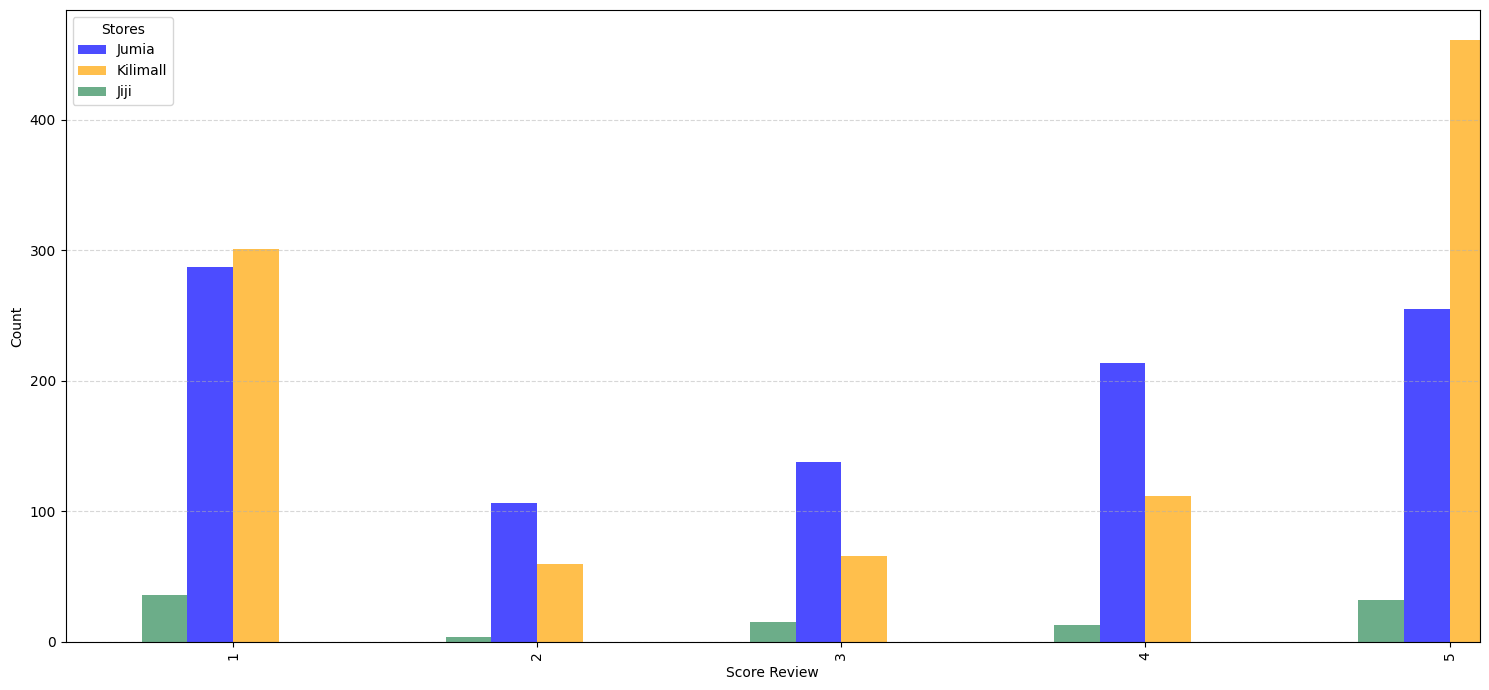

In [ ]:
import matplotlib.pyplot as plt

# Set figure size to ensure enough space for comparison
plt.figure(figsize=(15, 7))  # Adjusted to make it more readable

# Adjusted width and position to bring bars closer
bar_width = 0.15  # Smaller width to bring bars closer
space_between_bars = 0.008 # Small gap between bars

# JUMIA (Blue) with adjusted width and position
ax = Jumia_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='blue', alpha=0.7, width=bar_width, position=1, label='Jumia')

# KILIMALL (Orange) with adjusted width and position
Kilimall_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='#FFA500', alpha=0.7, width=bar_width, position=0, label='Kilimall', ax=ax)

# JIJI (Green) with adjusted width and position
Jiji_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='#2E8B57', alpha=0.7, width=bar_width, position=2, label='Jiji', ax=ax)

# Add labels and legend
ax.set_xlabel('Score Review')
ax.set_ylabel('Count')

# Customize grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add custom legend
plt.legend(title="Stores")

# Adjust layout to ensure no clipping
plt.tight_layout()

# Show the plot
plt.show()

####6.Sentiment Analysis using the pre-trained model Roberta

In [ ]:
from transformers import pipeline
classifier_sentiment = pipeline("sentiment-analysis")
classifier_sentiment("I like Africa Data School.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9934509992599487}]

In [ ]:
# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

# Ensure the DataFrame 'jumia_pointsort_data' exists before running sentiment analysis
if 'Jumia_pointsort_data' in locals() or 'Jumia_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Jumia_pointsort_data.columns:
        # Apply sentiment analysis to the 'extracted_emojis' column
        Jumia_pointsort_data["sentiment"] = Jumia_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Display the updated DataFrame
        print(Jumia_pointsort_data[["extracted_emojis", "sentiment"]])
    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                      extracted_emojis sentiment
497  perfect platform and great customer service fr...  POSITIVE
286  i have had terrible experience this weekend! n...  NEGATIVE
192  helpful when searching for products locally, p...  POSITIVE
295  quick response, easy to connect to the seller ...  POSITIVE
506  i have been using jiji since time immemorial w...  POSITIVE
..                                                 ...       ...
916                                               None   UNKNOWN
327                                               None   UNKNOWN
860                                               None   UNKNOWN
807                                               None   UNKNOWN
788                                               None   UNKNOWN

[1000 rows x 2 columns]


In [ ]:
##JUMIA

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Jumia_pointsort_data' in locals() or 'Jumia_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Jumia_pointsort_data.columns:
        # Apply sentiment analysis
        Jumia_pointsort_data["sentiment"] = Jumia_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Show DataFrame with new sentiment column
        #print(Jumia_pointsort_data[["extracted_emojis", "sentiment"]].head())

        # Now extract top 10 positive and negative emoji reviews
        Jumia_positive_reviews = Jumia_pointsort_data[Jumia_pointsort_data['sentiment'] == 'POSITIVE'].head(5)
        Jumia_negative_reviews = Jumia_pointsort_data[Jumia_pointsort_data['sentiment'] == 'NEGATIVE'].head(5)

        print("\nTop 10 Positive Reviews:")
        print(Jumia_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Jumia_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Top 10 Positive Reviews:
                                      extracted_emojis sentiment
497  perfect platform and great customer service fr...  POSITIVE
192  helpful when searching for products locally, p...  POSITIVE
295  quick response, easy to connect to the seller ...  POSITIVE
506  i have been using jiji since time immemorial w...  POSITIVE
58   very good app for buying and selling if they c...  POSITIVE

Top 10 Negative Reviews:
                                      extracted_emojis sentiment
286  i have had terrible experience this weekend! n...  NEGATIVE
243  great app, i love it! one issue though, i can'...  NEGATIVE
20   once you pay for a package, approval for new a...  NEGATIVE
77   i have been a jiji seller for over 3 years but...  NEGATIVE
500  the more the updates the less the value of the...  NEGATIVE


In [ ]:
##KILIMALL

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Kilimall_pointsort_data' in locals() or 'Kilimall_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Kilimall_pointsort_data.columns:
        # Apply sentiment analysis
        Kilimall_pointsort_data["sentiment"] = Jumia_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Show DataFrame with new sentiment column
        #print(Kilimall_pointsort_data[["extracted_emojis", "sentiment"]].head())

        # Now extract top 10 positive and negative emoji reviews
        Kilimall_positive_reviews = Kilimall_pointsort_data[Kilimall_pointsort_data['sentiment'] == 'POSITIVE'].head(5)
        Kilimall_negative_reviews = Kilimall_pointsort_data[Kilimall_pointsort_data['sentiment'] == 'NEGATIVE'].head(5)

        print("\nTop 10 Positive Reviews:")
        print(Kilimall_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Kilimall_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Top 10 Positive Reviews:
                                      extracted_emojis sentiment
9    quick response, easy to connect to the seller ...  POSITIVE
189  it's an excellent platform for linking clients...  POSITIVE
86   i like it.. however i have some fixes i realiz...  POSITIVE
952  great app. easy to use. some pictures on ads a...  POSITIVE
19                                                None  POSITIVE

Top 10 Negative Reviews:
                                      extracted_emojis sentiment
950  great app, i love it! one issue though, i can'...  NEGATIVE
212  very great app, makes me chat with sellers as ...  NEGATIVE
829  once you pay for a package, approval for new a...  NEGATIVE
759  it's a great app. gives ideas on the price of ...  NEGATIVE
621  been a pain in my back. can't load pictures of...  NEGATIVE


In [ ]:
##JIJI

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Jiji_pointsort_data' in locals() or 'Jiji_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Jumia_pointsort_data.columns:
        # Apply sentiment analysis
        Jiji_pointsort_data["sentiment"] = Jiji_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Show DataFrame with new sentiment column
        print(Jiji_pointsort_data[["extracted_emojis", "sentiment"]].head())

        # Now extract top 10 positive and negative emoji reviews
        Jiji_positive_reviews = Jiji_pointsort_data[Jiji_pointsort_data['sentiment'] == 'POSITIVE'].head(10)
        Jiji_negative_reviews = Jiji_pointsort_data[Jiji_pointsort_data['sentiment'] == 'NEGATIVE'].head(10)

        print("\nTop 10 Positive Reviews:")
        print(Jumia_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Jiji_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                     extracted_emojis sentiment
36  perfect platform and great customer service fr...  POSITIVE
19  i have had terrible experience this weekend! n...  NEGATIVE
41  helpful when searching for products locally, p...  POSITIVE
6   quick response, easy to connect to the seller ...  POSITIVE
2   i have been using jiji since time immemorial w...  POSITIVE

Top 10 Positive Reviews:
                                      extracted_emojis sentiment
497  perfect platform and great customer service fr...  POSITIVE
192  helpful when searching for products locally, p...  POSITIVE
295  quick response, easy to connect to the seller ...  POSITIVE
506  i have been using jiji since time immemorial w...  POSITIVE
58   very good app for buying and selling if they c...  POSITIVE

Top 10 Negative Reviews:
                                     extracted_emojis sentiment
19  i have had terrible experience this weekend! n...  NEGATIVE
1   great app, i love it! one issue though, i 

###7. Analysis & Recommendations